### Market Basket Analysis with Python of E-Commerce Data

### The dataset
We'll use a dataset from a Brazilian ecommerce site (olist.com) that is divided into three CSV files:

1.olist_order_items_dataset.csv


2.olist_products_dataset.csv


3.product_category_name_translation.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load orders dataset.
orders = pd.read_csv('C:/Users/RISHABH/Desktop/olist_order_items_dataset.csv')

# Load products items dataset.
products = pd.read_csv('C:/Users/RISHABH/Desktop/olist_products_dataset.csv')

# Load translations dataset.
translations = pd.read_csv('C:/Users/RISHABH/Desktop/product_category_name_translation.csv')

In [3]:
orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19-09-17 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03-05-17 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18-01-18 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15-08-18 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13-02-17 13:57,199.90,18.14


In [4]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### Translating item category names
The product names are given in Portuguese.

1We'll translate the names to English using a pandas DataFrame named translations.

2.Merge() performs a join operation on columns or indices.

3On is the column on which to perform the join.

4.how specifies which keys to use to perform the join.

In [8]:
# Translate product names to English.
products = products.merge(translations, on='product_category_name', how="left")

# Print English names.
products['product_category_name_english']

0                        perfumery
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name_english, Length: 32951, dtype: object

### Convert product IDs to product category names.
We can work with product IDs directly, but do not have product names.

-Map product IDs to product category names, which are available in products.

-Use another .merge() with orders and subset of products columns.

Using category names will also simplify the analysis, since there are fewer categories than products.

In [9]:
orders = orders.merge(products[['product_id','product_category_name_english']], on='product_id', how='left')

In [10]:
orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19-09-17 9:45,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03-05-17 11:05,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18-01-18 14:48,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15-08-18 10:10,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13-02-17 13:57,199.90,18.14,garden_tools


In [11]:
orders.dropna(inplace=True, subset=['product_category_name_english'])

In [12]:

len(orders['product_id'].unique())

32328

In [13]:
len(orders['product_category_name_english'].unique())

71

### Construct transactions from order and product data
.We will perform Market Basket Analysis on transactions.

.A transaction consists of the unique items purchased by a customer.

.Need to extract transactions from orders DataFrame.

.Group all items in an order

In [14]:
example1 = orders[orders['order_id'] == 'fe64170e936bc5f6a6a41def260984b9']['product_category_name_english']

# Print example.
example1

111984     bed_bath_table
111985    furniture_decor
Name: product_category_name_english, dtype: object

In [15]:
example2 = orders[orders['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']['product_category_name_english']
example2

112640    watches_gifts
112641    watches_gifts
112642    watches_gifts
112643    watches_gifts
Name: product_category_name_english, dtype: object

### Insight: Aggregation reduces the number of items and, therefore, itemsets.

Map orders to transactions.

.groupby() splits a DataFrame into groups according to some criterion.

.unique() returns list of unique values.

In [16]:
transactions = orders.groupby("order_id").product_category_name_english.unique()
transactions.head()

order_id
00010242fe8c5a6d1ba2dd792cb16214         [cool_stuff]
00018f77f2f0320c557190d7a144bdd3           [pet_shop]
000229ec398224ef6ca0657da4fc703e    [furniture_decor]
00024acbcdf0a6daa1e931b038114c75          [perfumery]
00042b26cf59d7ce69dfabb4e55b4fd9       [garden_tools]
Name: product_category_name_english, dtype: object

### Plot 50 largest categories of transactions.

<AxesSubplot:>

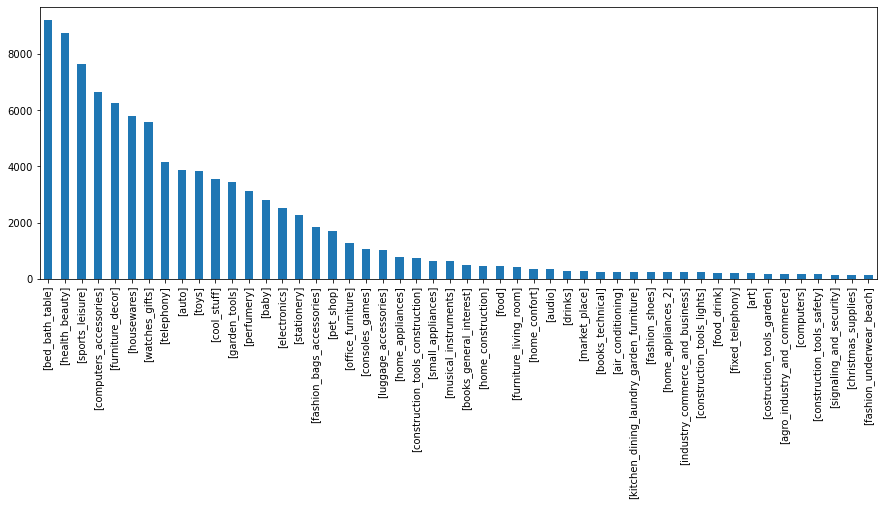

In [17]:
transactions.value_counts()[:50].plot(kind='bar', figsize=(15,5))

### 
Insight 1: The most common itemsets consist of a single item.

Insight 2: There's a long tail of categories that consist of infrequently purchased items.

Use .tolist() to transform a DataFrame or Series object into a list.

In [18]:
transactions = transactions.tolist()

In [19]:
len(transactions)

97256

In [20]:
# Count number of unique item categories for each transaction.
counts = [len(transaction) for transaction in transactions]

In [21]:
# Print maximum number of items in a transaction.
np.median(counts)

1.0

In [22]:
# Print maximum number of items in a transaction.
np.max(counts)

3

### Association Rule and Metrics

### 
Association rule: an "if-then" relationship between two itemsets.

rule: if {coffee) then {milk}.

antecedent: coffee

consequent: milk

Metric: a measure of the strength of association between two itemsets.

rule: if {coffee) then {milk}

support: 0.60

leverage: 0.30

### One-hot encode the transaction data

One-hot encoding data.

TransactionEncoder() instantiates an encoder object.

.fit() creates mapping between list and one-hot encoding.

.transform() transforms list into one-hot encoded array.

In [23]:
from mlxtend.preprocessing import TransactionEncoder

In [24]:
# Instantiate an encoder.
encoder = TransactionEncoder()

# Fit encoder to list of lists.
encoder.fit(transactions)

# Transform lists into one-hot encoded array.
onehot = encoder.transform(transactions)

# Convert array to pandas DataFrame.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [25]:
onehot.head()

,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97256 entries, 0 to 97255
Data columns (total 71 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   agro_industry_and_commerce               97256 non-null  bool 
 1   air_conditioning                         97256 non-null  bool 
 2   art                                      97256 non-null  bool 
 3   arts_and_craftmanship                    97256 non-null  bool 
 4   audio                                    97256 non-null  bool 
 5   auto                                     97256 non-null  bool 
 6   baby                                     97256 non-null  bool 
 7   bed_bath_table                           97256 non-null  bool 
 8   books_general_interest                   97256 non-null  bool 
 9   books_imported                           97256 non-null  bool 
 10  books_technical                          97256 non-null  bool 
 11  cd

### Compute the support metric

Support measures the frequency with which an itemset appears in a database of transactions.

$$support(X) = \frac{\text{number of transactions containing X}}{\text{total number of transactions}}$$

.mean(axis=0) computes support values for one-hot encoded DataFrame.

A high support value indicates that items in an itemset are purchased together frequently and, thus, are associated with each other.

In [27]:
onehot.mean(axis=0)

agro_industry_and_commerce    0.001871
air_conditioning              0.002601
art                           0.002077
arts_and_craftmanship         0.000236
audio                         0.003599
                                ...   
stationery                    0.023762
tablets_printing_image        0.000812
telephony                     0.043175
toys                          0.039956
watches_gifts                 0.057827
Length: 71, dtype: float64

In [28]:

# Print distribution of item counts.
onehot.sum(axis=1).value_counts()

1    96530
2      711
3       15
dtype: int64

In [29]:
onehot['sports_leisure_health_beauty'] = onehot['sports_leisure'] & onehot['health_beauty']

# Print support value.
onehot['sports_leisure_health_beauty'].mean(axis = 0)

0.00014394998766142962

### Compute the confidence metric
The support metric doesn't provide information about direction.

$support(antecedent, consequent) = support(consequent, antecedent)$

.The confidence metric has a direction.

.Conditional probability of the consequent, given the antecedent.
$$confidence(antecedent \rightarrow consequent)= \frac{support(antecedent, consequent)}{support(antecedent)}$$

.A high value of confidence indicates that the antecedent and consequent are associated and that the direction of the association runs from the antecedent to the consequent.

In [30]:
# Compute joint support for sports_leisure and health_beauty.
joint_support = (onehot['sports_leisure'] & onehot['health_beauty']).mean()

# Print confidence metric for sports_leisure -> health_beauty.
joint_support / onehot['sports_leisure'].mean()

0.0018134715025906734

In [31]:
joint_support / onehot['sports_leisure'].mean()

0.0018134715025906734

### Insight: 
$confidence(sports\_leisure \rightarrow health\_beauty)$ was higher than $confidence(health\_beauty \rightarrow sports\_leisure)$. 

Since the two have the same joint support, the confidence measures will differ only by the antecedent support. 

The higher confidence metric means that the antecedent has lower support.

### The Apriori Algorithm and Pruning

The Apriori algorithm identifies frequent (high support) itemsets using something called the Apriori principle, which states that a superset that contains an infrequent item is also infrequent.

Pruning is the process of removing itemsets or association rules, typically based on the application of a metric threshold.


The mlxtend module will enable us to apply the Apriori algorithm, perform pruning, and compute association rules.



### Applying the Apriori algorithm

.Use apriori() to identify frequent itemsets.

.min_support set the item frequency threshold used for pruning.

In [32]:
from mlxtend.frequent_patterns import apriori

# Apply apriori algorithm to data with min support threshold of 0.01.
frequent_itemsets = apriori(onehot, min_support = 0.01)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.040070,(5)
1,0.029664,(6)
2,0.096827,(7)
3,0.068777,(15)
4,0.010920,(16)
5,0.037345,(20)
6,0.026219,(26)
7,0.019166,(28)
8,0.066310,(39)
9,0.036173,(42)


###  Observation 1: apriori returns a DataFrame with a support column and an itemsets column.

Observation 2: By default apriori returns itemset numbers, rather than labels. We can change this by using the use_colnames parameter.

Insight: All itemsets with a support of greater than 0.01 contain a single item.

Use use_colnames to use item names, rather than integer IDs.

In [33]:
# Apply apriori algorithm to data with min support threshold of 0.001.
frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.001871,(agro_industry_and_commerce)
1,0.002601,(air_conditioning)
2,0.002077,(art)
3,0.003599,(audio)
4,0.040070,(auto)
5,0.029664,(baby)
6,0.096827,(bed_bath_table)
7,0.005264,(books_general_interest)
8,0.002673,(books_technical)
9,0.001316,(christmas_supplies)


In [34]:
# Apply apriori algorithm to data with a two-item limit.
frequent_itemsets = apriori(onehot, min_support = 0.00005, max_len = 2, use_colnames = True)

### Computing association rules from Apriori output

Use association_rules() to compute and prune association rules from output of apriori().

In [35]:
from mlxtend.frequent_patterns import association_rules

# Recover association rules using support and a minimum threshold of 0.0001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.0001)

# Print rules header.
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(baby),(bed_bath_table),0.029664,0.096827,0.000175,0.005893,0.060856,-0.002697,0.908527
1,(bed_bath_table),(baby),0.096827,0.029664,0.000175,0.001805,0.060856,-0.002697,0.972091
2,(cool_stuff),(baby),0.037345,0.029664,0.000206,0.005507,0.185633,-0.000902,0.975709
3,(baby),(cool_stuff),0.029664,0.037345,0.000206,0.006932,0.185633,-0.000902,0.969375
4,(furniture_decor),(baby),0.066310,0.029664,0.000123,0.001861,0.062728,-0.001844,0.972145


### Pruning association rules

In [36]:
# Recover association rules using confidence threshold of 0.01.
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.01)

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(art),(furniture_decor),0.002077,0.066310,0.000051,0.024752,0.373287,-0.000086,0.957388
1,(audio),(watches_gifts),0.003599,0.057827,0.000062,0.017143,0.296452,-0.000146,0.958606
2,(furniture_decor),(bed_bath_table),0.066310,0.096827,0.000720,0.010854,0.112101,-0.005701,0.913084
3,(home_confort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881
4,(construction_tools_lights),(furniture_decor),0.002509,0.066310,0.000113,0.045082,0.679872,-0.000053,0.977770
5,(furniture_living_room),(furniture_decor),0.004339,0.066310,0.000072,0.016588,0.250155,-0.000216,0.949439
6,(home_confort),(furniture_decor),0.004082,0.066310,0.000062,0.015113,0.227921,-0.000209,0.948018
7,(home_construction),(furniture_decor),0.005038,0.066310,0.000134,0.026531,0.400103,-0.000200,0.959137
8,(home_construction),(garden_tools),0.005038,0.036173,0.000072,0.014286,0.394932,-0.000110,0.977796
9,(sports_leisure_health_beauty),(health_beauty),0.000144,0.090853,0.000144,1.000000,11.006790,0.000131,inf


In [37]:
# Select rules with leverage higher than 0.0.
rules = rules[rules['leverage'] > 0.0]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(home_confort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881
9,(sports_leisure_health_beauty),(health_beauty),0.000144,0.090853,0.000144,1.000000,11.006790,0.000131,inf
10,(sports_leisure_health_beauty),(sports_leisure),0.000144,0.079378,0.000144,1.000000,12.597927,0.000133,inf


### Insight: 

The Apriori algorithm reduced the number of itemsets from $2^{71}$ to 113.

Pruning allowed us to identify to a single association rule that could be useful for cross-promotional purposes: $\{home\_comfort\} \rightarrow \{bed\_bath\_table\}$.